# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-41, 42, 22 (Stand: April 2024)

[Raum F1-19](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Vakuum

Name: Stier Vorname: Jonah E-Mail: uifed@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Mutter Vorname: Raphael E-Mail: unodw@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo31

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Marcel Gaisdörfer

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 27.05.2024

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Vakuum/README.md).**

## Aufgabe 1: Versuchsaufbau

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Vakuum/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit dem Versuchsaufbau vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kafe2
from uncertainties import ufloat
from uncertainties.umath import log

### Aufgabe 1.1: Orientierung und Beschreibung des Versuchsaufbaus

 * Verschaffen Sie sich einen Überblick über die verwendeten Apparaturen und beschreiben Sie sie in eigenen Worten.  
 * Verfolgen Sie hierzu die Leitungen und identifizieren Sie die verwendeten Elemente in der zugehörigen Skizze. 
   
---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

### Aufgabe 1.2: Gasentladung (Demonstrationsversuch)

 * Schalten Sie das Hochspannungsgerät zur Erzeugung der Gasentladungen ein.
 * Evakuieren Sie RZ und die Gasentladungsröhre gemeinsam mit Hilfe der DSP. 
 * Senken Sie den Druck kontinuierlich, bis die Gasentladung erlischt. 
 * Skizzieren und beschreiben Sie die Gasentladung in Abhängigkeit vom Gasdruck. 

---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

## Aufgabe 2: Saugvermögen und Leitwert

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Vakuum/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Untersuchen Sie das effektive Saugvermögen von DSP und TMP, sowie den Strömungsleitwert eines dünnen Rohrs. 
 - Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Saugvermögen der DSP

Evakuieren Sie die Apparatur mit Hilfe der DSP und stellen Sie die folgenden funktionalen Zusammenhänge des Druck jeweils **bei T1** geeignet graphisch dar:
 - Den Druck als Funktion der Zeit $p(t)$. 
 - Das Saugvermögen als Funktion des Drucks $S(p)$.

---

Für die Auswertung der Messung wurde ein Video des Displays aufgenommen und mithilfe von Tesseract ausgewertet. Dabei wurden für jeden Frame alle drei Anzeigewerte ausglesen, sodass wir für jede Sekunde 30 Messwerte erhalten. 

Beim Ablesen durch Tesseract sind unvermeidbare Fehler aufgetaucht, welche sich aber auf unter 10% der Aufgenommen Messwerte beschränkt haben. Es stellte eine Herausforderung dar, diese fehlerhaft bestimmten Werte zu identifizieren und entsprechend aus dem Array zu löschen. Dadurch, dass die Hohe Framerate des Videos von 30FPS weit über derjenigen des Displays liegt, exisiteren jedoch für jeden Displaywert mehrere Bilder und entsprechend konnte der Fehler dadurch korrigiert/interpoliert werden.

Dadurch ergaben sich jeweils 10.000 Messwerte für 2.1 und 2.2 und 20.000 Messwerte für 2.3.

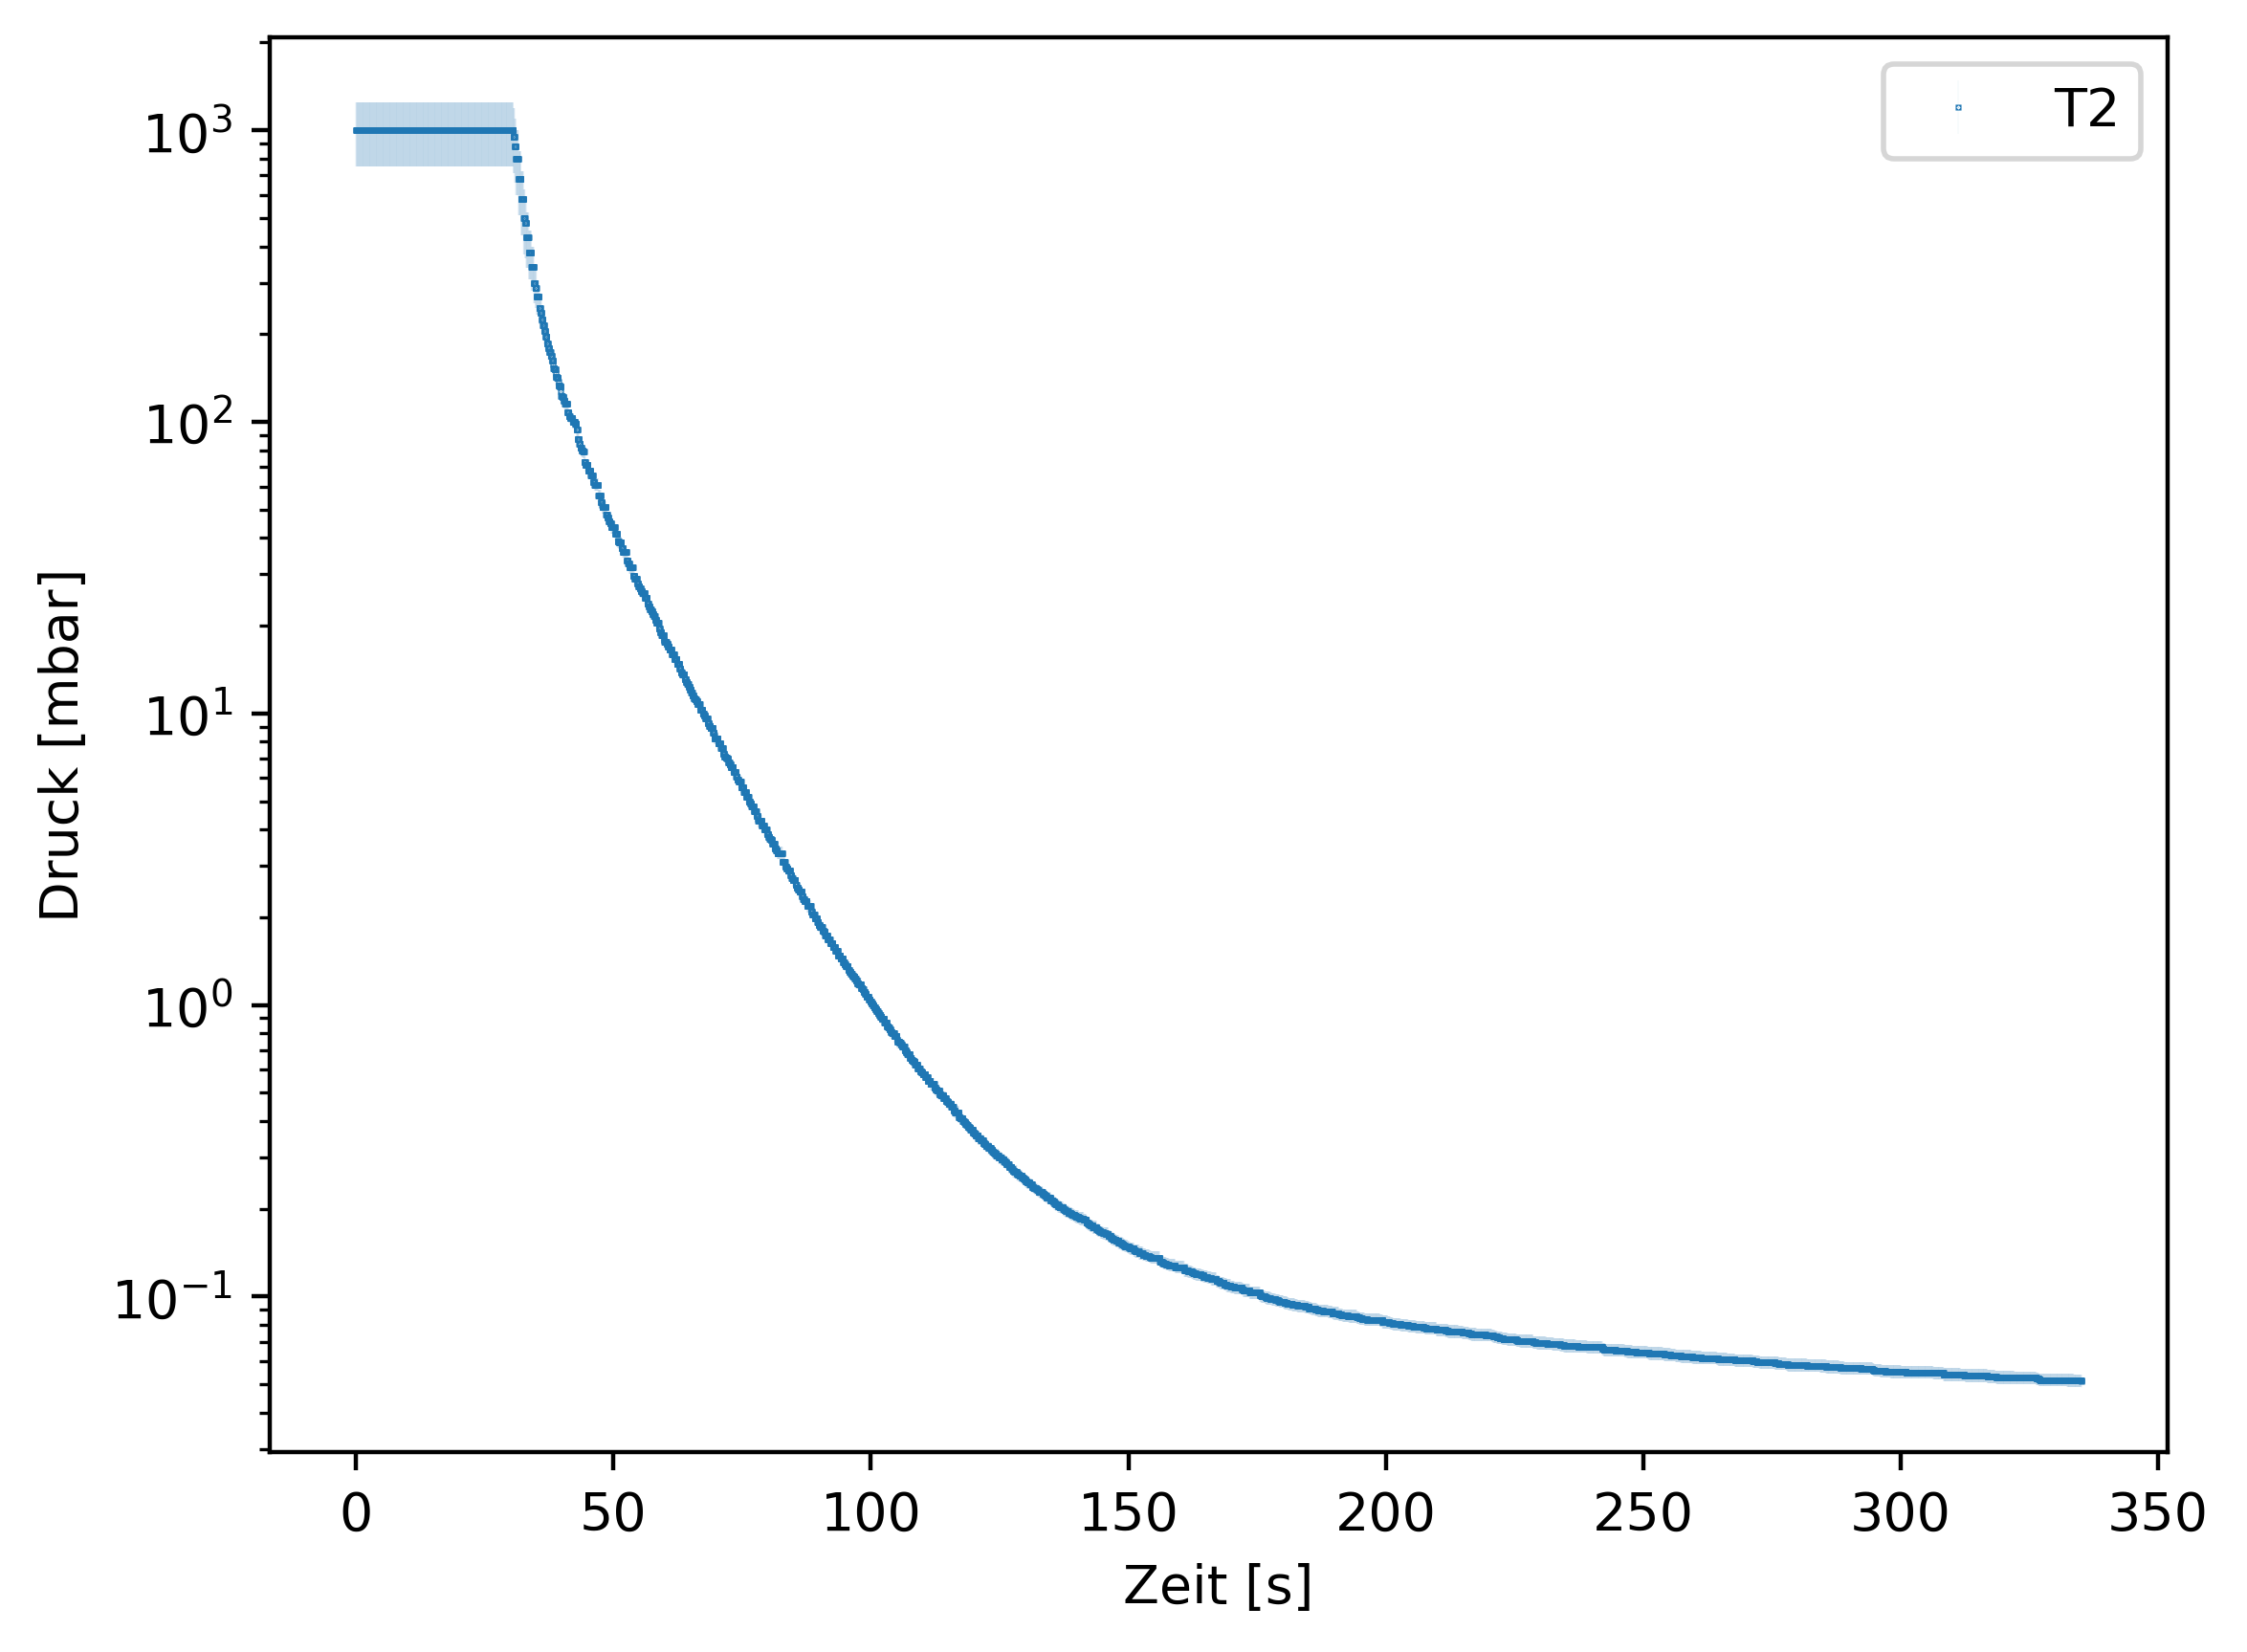

In [596]:
saug = pd.read_csv('doc/2.1.csv')

def error(x):
    if np.any(x<100):
        return x*0.05
    if np.any(x> 500):
        return x*0.25
    if np.any(100<=x<=500):
        return x*(x/100)*0.05
        

saug['deltaT1'] = saug['T1'].apply(error)

plt.errorbar(saug['time[s]'],saug['T1'],yerr=saug['deltaT1'],fmt='s',lw=0.01,markersize = 0.1,label='T2')



#plt.errorbar(saug['time[s]'],saug['T1'],yerr=saug['deltaT1'],fmt='s',color='black',lw=0.01,markersize = 0.01)

plt.gcf().set_dpi(400)
plt.yscale('log')
plt.ylabel('Druck [mbar]')
plt.xlabel('Zeit [s]')
plt.legend()
plt.show()

saug = saug[907:]
saug['time[s]'] -= list(saug['time[s]'])[0]+0.0001



Als Fehler für die Messung wurden die Angaben aus dem Datenblatt verwendet:

- $10^{-3}\lesssim p \lesssim 10^{2}\ \mathrm{mbar}$: $\pm5\%$

- $10^{2}\lesssim p \lesssim 10^{3}\ \mathrm{mbar}$: $\pm25\%$

Wobei der zwischenbereich wie folgt modelliert wurde:

- $100\mathrm{mbar} <p< 500\mathrm{mbar}$:  $\pm \frac{p}{500\,\mathrm{mbar}}\%$




$$
dS = \frac{dV}{dt}
$$

Aus der idealen Gasgleichung

$$
pV = nRT
$$

folgt:
$$
V(t) = V_{0}\frac{p_{0}}{p(t)}
$$

und somit:
$$
dS = -V_{0}\,\frac{p_{0}}{\dot{p}^2(t)}\,p(t)
$$
Integration liefert:
$$
S(t) = -\frac{V}{t-t_{0}}\ln\left(\frac{p}{p_{0}}\right)
$$

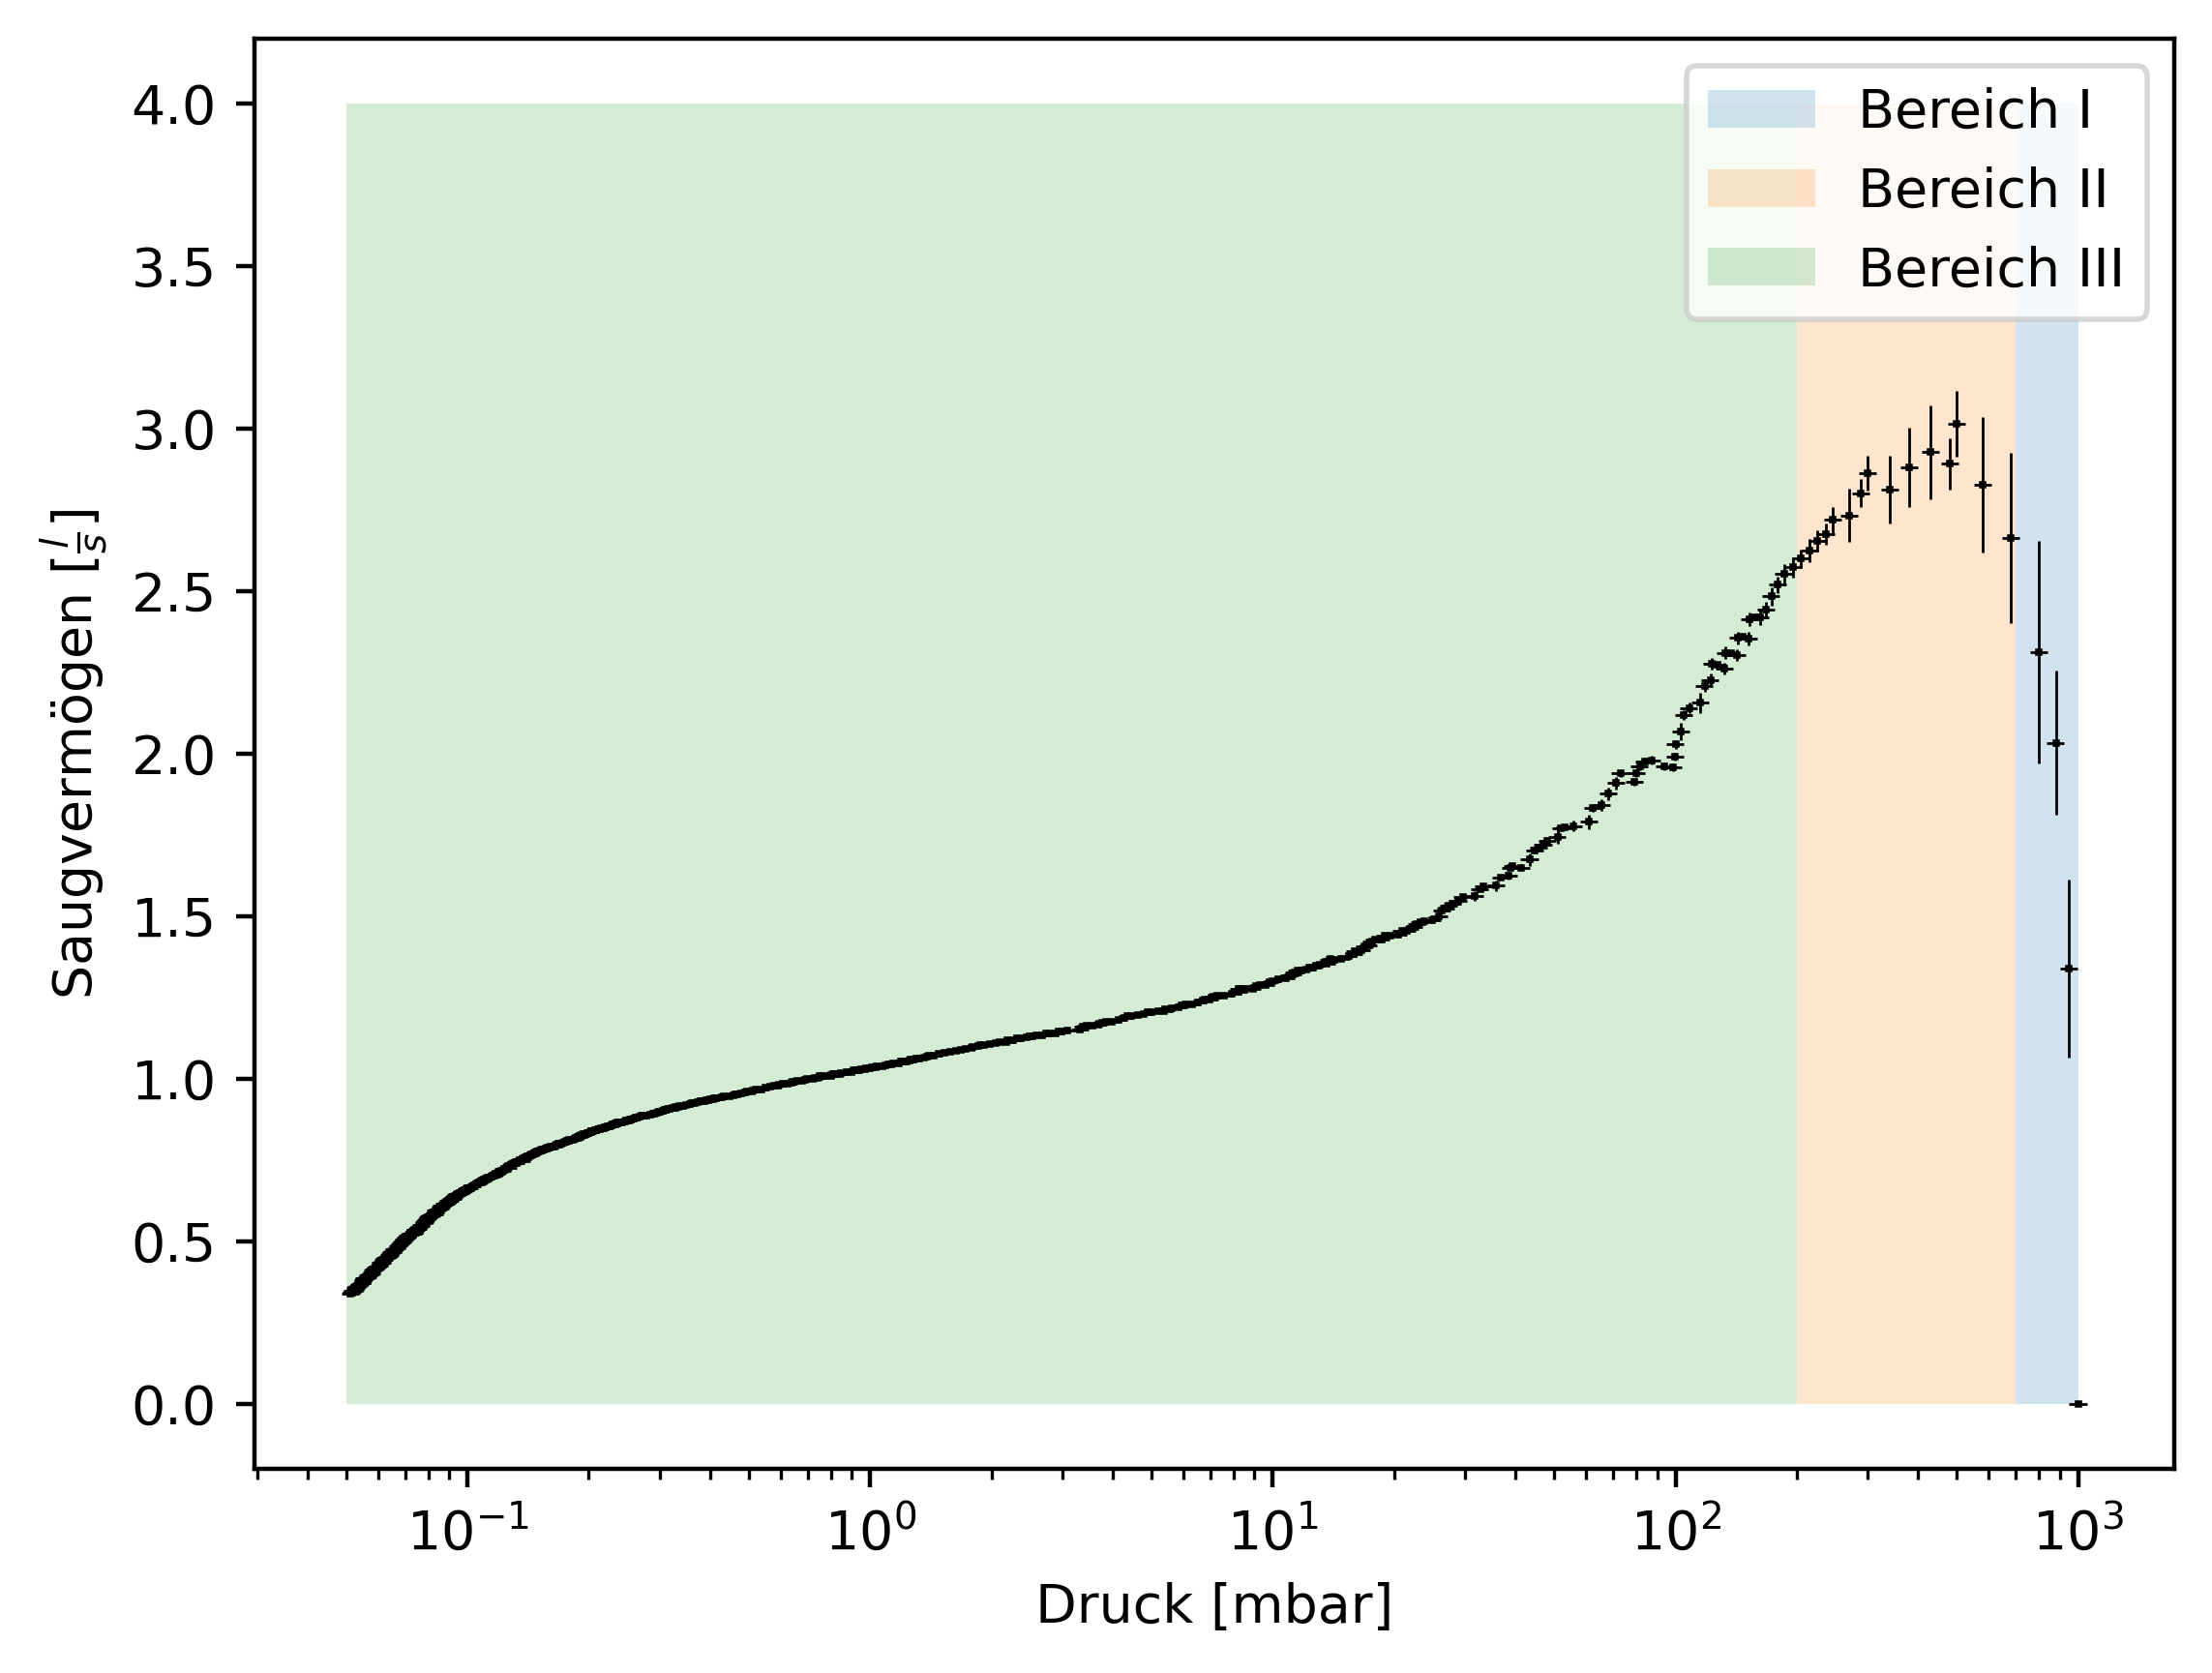

In [585]:
def S(t,p,V=10.5,p0=1000):
    return -V/t*np.log(p/p0)
saug['S'] = S(saug['time[s]'],saug['T1'])
result = saug.groupby('T1')['S'].agg(['mean', 'std'])

plt.errorbar(result.index,result['mean'],yerr=result['std'],xerr=error(result.index),fmt='s',color='black',lw=0.5,markersize = 0.5)
plt.xlabel('Druck [mbar]')
plt.ylabel(r'Saugvermögen [$\frac{l}{s}$]')
plt.xscale('log')

#Bereiche Definineren
plt.fill_betweenx((0,4),700,1000,alpha=0.2,label='Bereich I')
plt.fill_betweenx((0,4),200,700,alpha=0.2,label='Bereich II')
plt.fill_betweenx((0,4),0.05,200,alpha=0.2,label='Bereich III')

plt.legend()

plt.gcf().set_dpi(400)


Bei hohen Drücken(Bereich III) seigt die Saugleistung immer weiter an, da sich die Pumpeffozienz immer weiter erhöht. Desweiteren ist zu erkennen, dass Bereich II in auf der Logarithmischen Skala recht klein erscheint, alos das die maximale Saugleistung nur in einem relativ kleinen Druckbereich erziehlt wird. Bei weiter fallendem Druck nimmt die Saugleistung immer weiter ab (Bereich III).

Bereich 2 wird an das Modell

$$
p(t) = p_{0}\,e^{-c\,t}
$$
mit
$$
c = \frac{S}{V}
$$
angepasst.

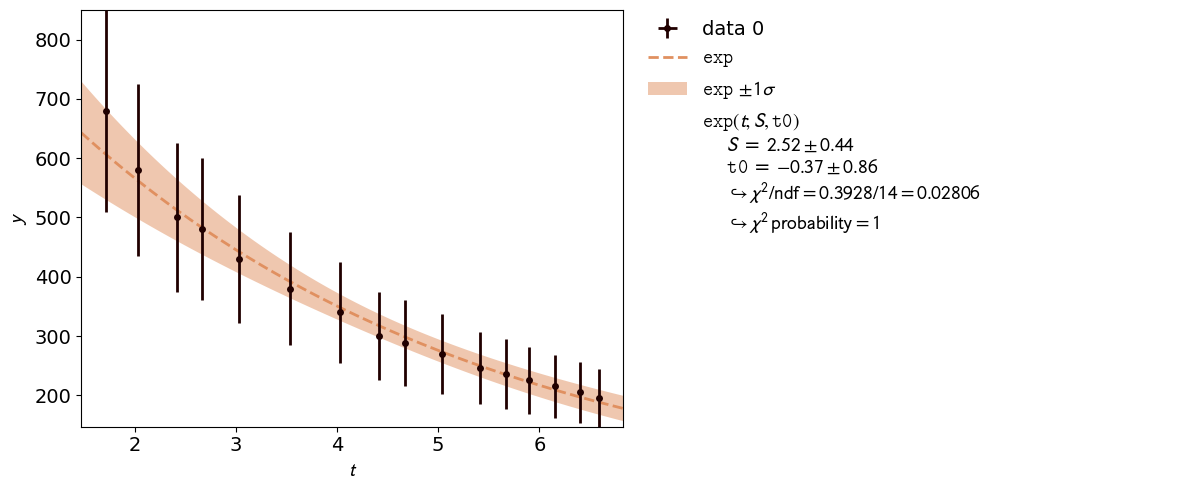

In [382]:
V = 10.5
def exp(t,S,t0):
    return 1000*np.exp(-S/V*(t-t0))

inter = saug[50:200]

res2 = inter.groupby('T1')['time[s]'].agg(['mean', 'std'])

fit = kafe2.xy_fit(exp,res2['mean'],res2.index,y_error=error(res2.index))
kafe2.plot()
#p = kafe2.Plot([fit])
#saug['S'][1600:2200].mean()

Der Fit scheint mit einer $\chi^2$-Wahrscheinlihckeit von 1 sehr gut zu sein.
Wie zu erwarten liegt der hierbei bestimmte wert für das Saugvermögen nahe bei dem, was man auf dem Graphaen in Bereich II ablesen kann.

$
S = 2.25 \pm 0.44 \frac{l}{s}
$

### Aufgabe 2.2: Leitwert eines dünnen Rohrs

 - Bei der Verbindungsleitung L [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Vakuum/figures/VakuumSkizze.png) handelt es sich im Originalaufbau um einen Metallwellschlauch. Tauschen Sie diesen gegen das bereitliegende etwa gleichlange dünne Metallrohr aus.
 - Bestimmen Sie die Drucke $p_{1}$ (bei T1) vor und $p_{2}$ (bei T2) hinter dem Rohr als Funktion der Zeit. 
 - Bestimmen Sie aus den gewonnenen Daten den Leitwert des Rohrs als Funktion des Drucks.

---

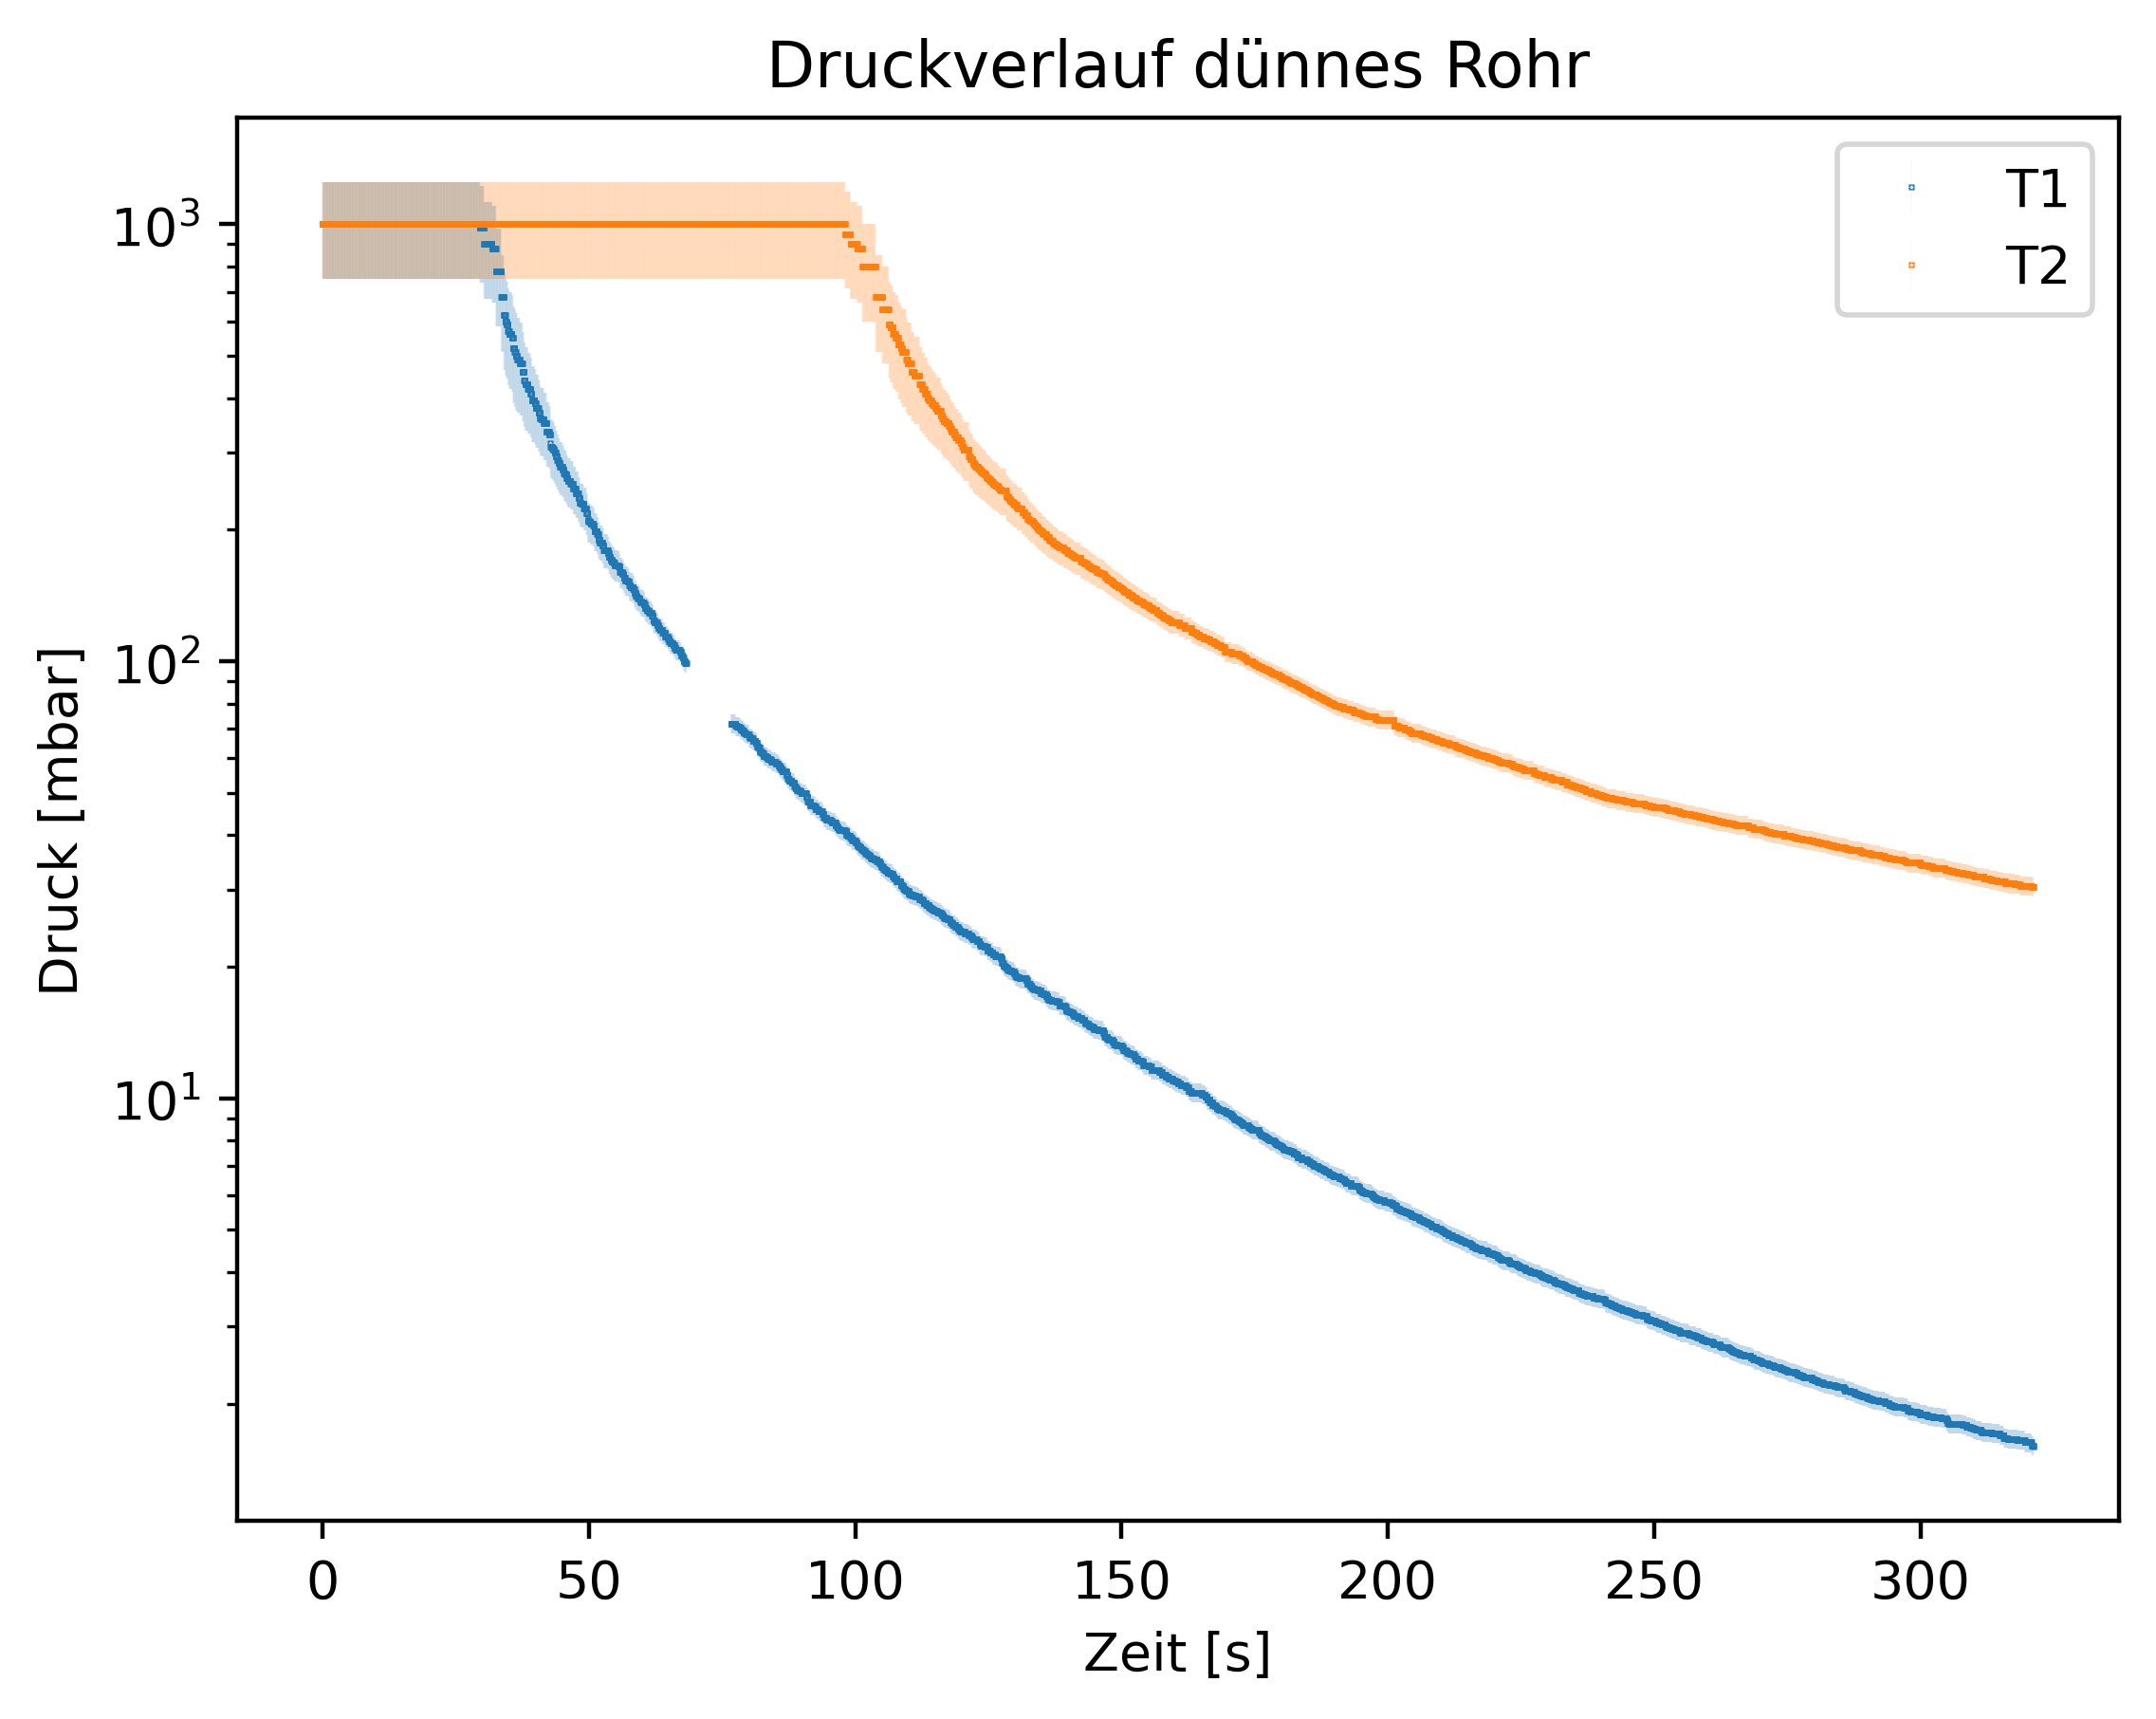

In [595]:
rohr = pd.read_csv('doc/2.2.csv')
rohr['deltaT1'] = rohr['T1'].apply(error)
rohr['deltaT2'] = rohr['T2/T3'].apply(error)



plt.errorbar(rohr['time[s]'],rohr['T1'],yerr=rohr['deltaT1'],fmt='s',lw=0.01,markersize = 0.1,label='T1')
plt.errorbar(rohr['time[s]'],rohr['T2/T3'],yerr=rohr['deltaT2'],fmt='s',lw=0.01,markersize = 0.1,label='T2')

plt.ylabel('Druck [mbar]')
plt.xlabel('Zeit [s]')
plt.title('Druckverlauf dünnes Rohr')

plt.gcf().set_dpi(400)
plt.legend()
plt.yscale('log')

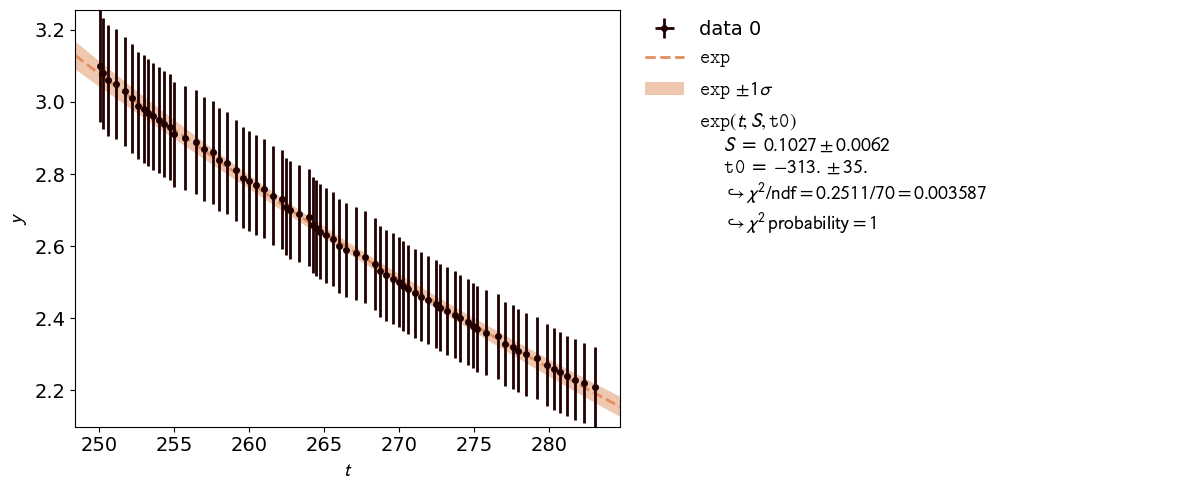

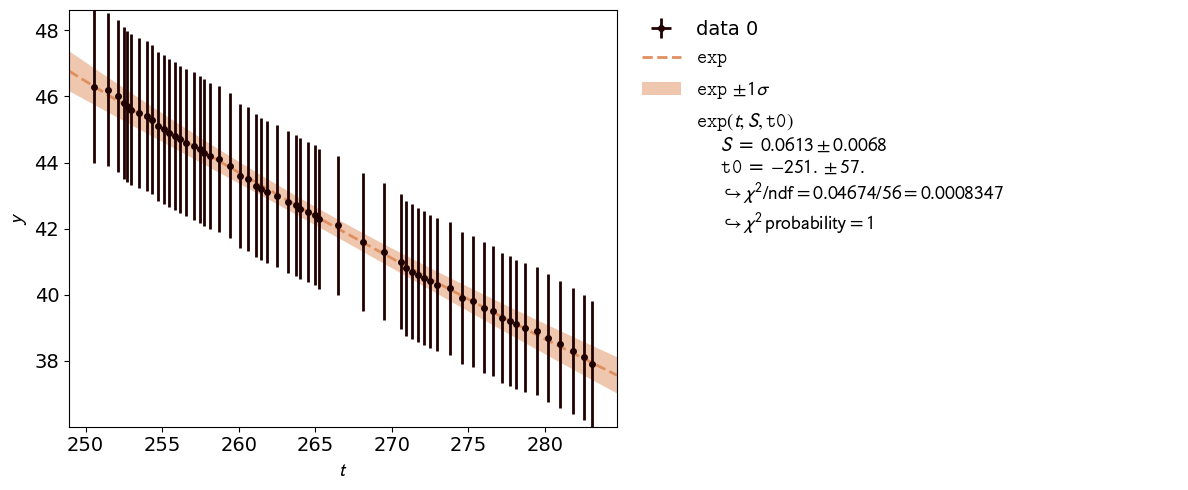

22.323765+/-1.2440138173077713

In [520]:
V = 10
inter = rohr[7500:8500]

res3 = inter.groupby('T1')['time[s]'].agg(['mean', 'std'])
fit1 = kafe2.xy_fit(exp,res3['mean'],res3.index,y_error=error(res3.index))
kafe2.plot()

res3 = inter.groupby('T2/T3')['time[s]'].agg(['mean', 'std'])
fit2 = kafe2.xy_fit(exp,res3['mean'],res3.index,y_error=error(res3.index))
kafe2.plot()
dP = (ufloat(inter['T2/T3'].mean(),inter['T2/T3'].std())+ufloat(inter['T1'].mean(),inter['T1'].std()))/2
plt.show()
dP

Für die Leitfähfigkeit gilt:
$$
L = \frac{S_{1}\,S_{2}}{S_{1}-
S_{2}}
$$

In [473]:
def L(S1,S2):
    return S1*S2/(S1-S2)
L(ufloat(fit1['parameter_values']['S'],fit1['parameter_errors']['S']),ufloat(fit2['parameter_values']['S'],fit2['parameter_errors']['S']))

0.1517958137140187+/-0.04363354418383192

Mit Knudsen:
$$
L[\mathrm{l/s}] = \frac{\pi\,R^{4}\,\overline{p}}{8\,\eta\,\ell}
$$
$$
\hphantom{L[\mathrm{l/s}]}=140\frac{\left(d[\mathrm{cm}]\right)^{4}}{\ell[\mathrm{cm}]}\, \overline{p}[\mathrm{mbar}]
$$

In [474]:
140*0.2**4/44*dP

0.1136482581818182+/-0.006333161251748654

Wir erhalten durch unserer Messung im Zeitraum $t \in [250s,...,290s]$ einen Wert für L von:

$L_{Messung} = 0.152\pm0.044 \,\frac{l}{s}$

Dieser stimmt in seiner Unsicherheit durch den durch die Knudsen-Formel bestimmten Wert im Rahmen seiner Unsicherheit überein:

$L_{Knudesn} = 0.114\pm 0.006 \,\frac{l}{s}$

### Aufgabe 2.3: Saugvermögen der TMP

 - Nehmen Sie die TMP in Betrieb und bestimmen Sie analog zu **Aufgabe 2.1** das Saugvermögen der TMP als Funktion des Drucks bei IM. 
 - Stellen Sie S(p) für die DSP und die TMP in einem Diagramm graphisch dar und diskutieren Sie Ihr Ergebnis.
 - Schätzen Sie die Kraft ab, mit der die Glasglocke auf die Gummidichtung gedrückt wird.

---

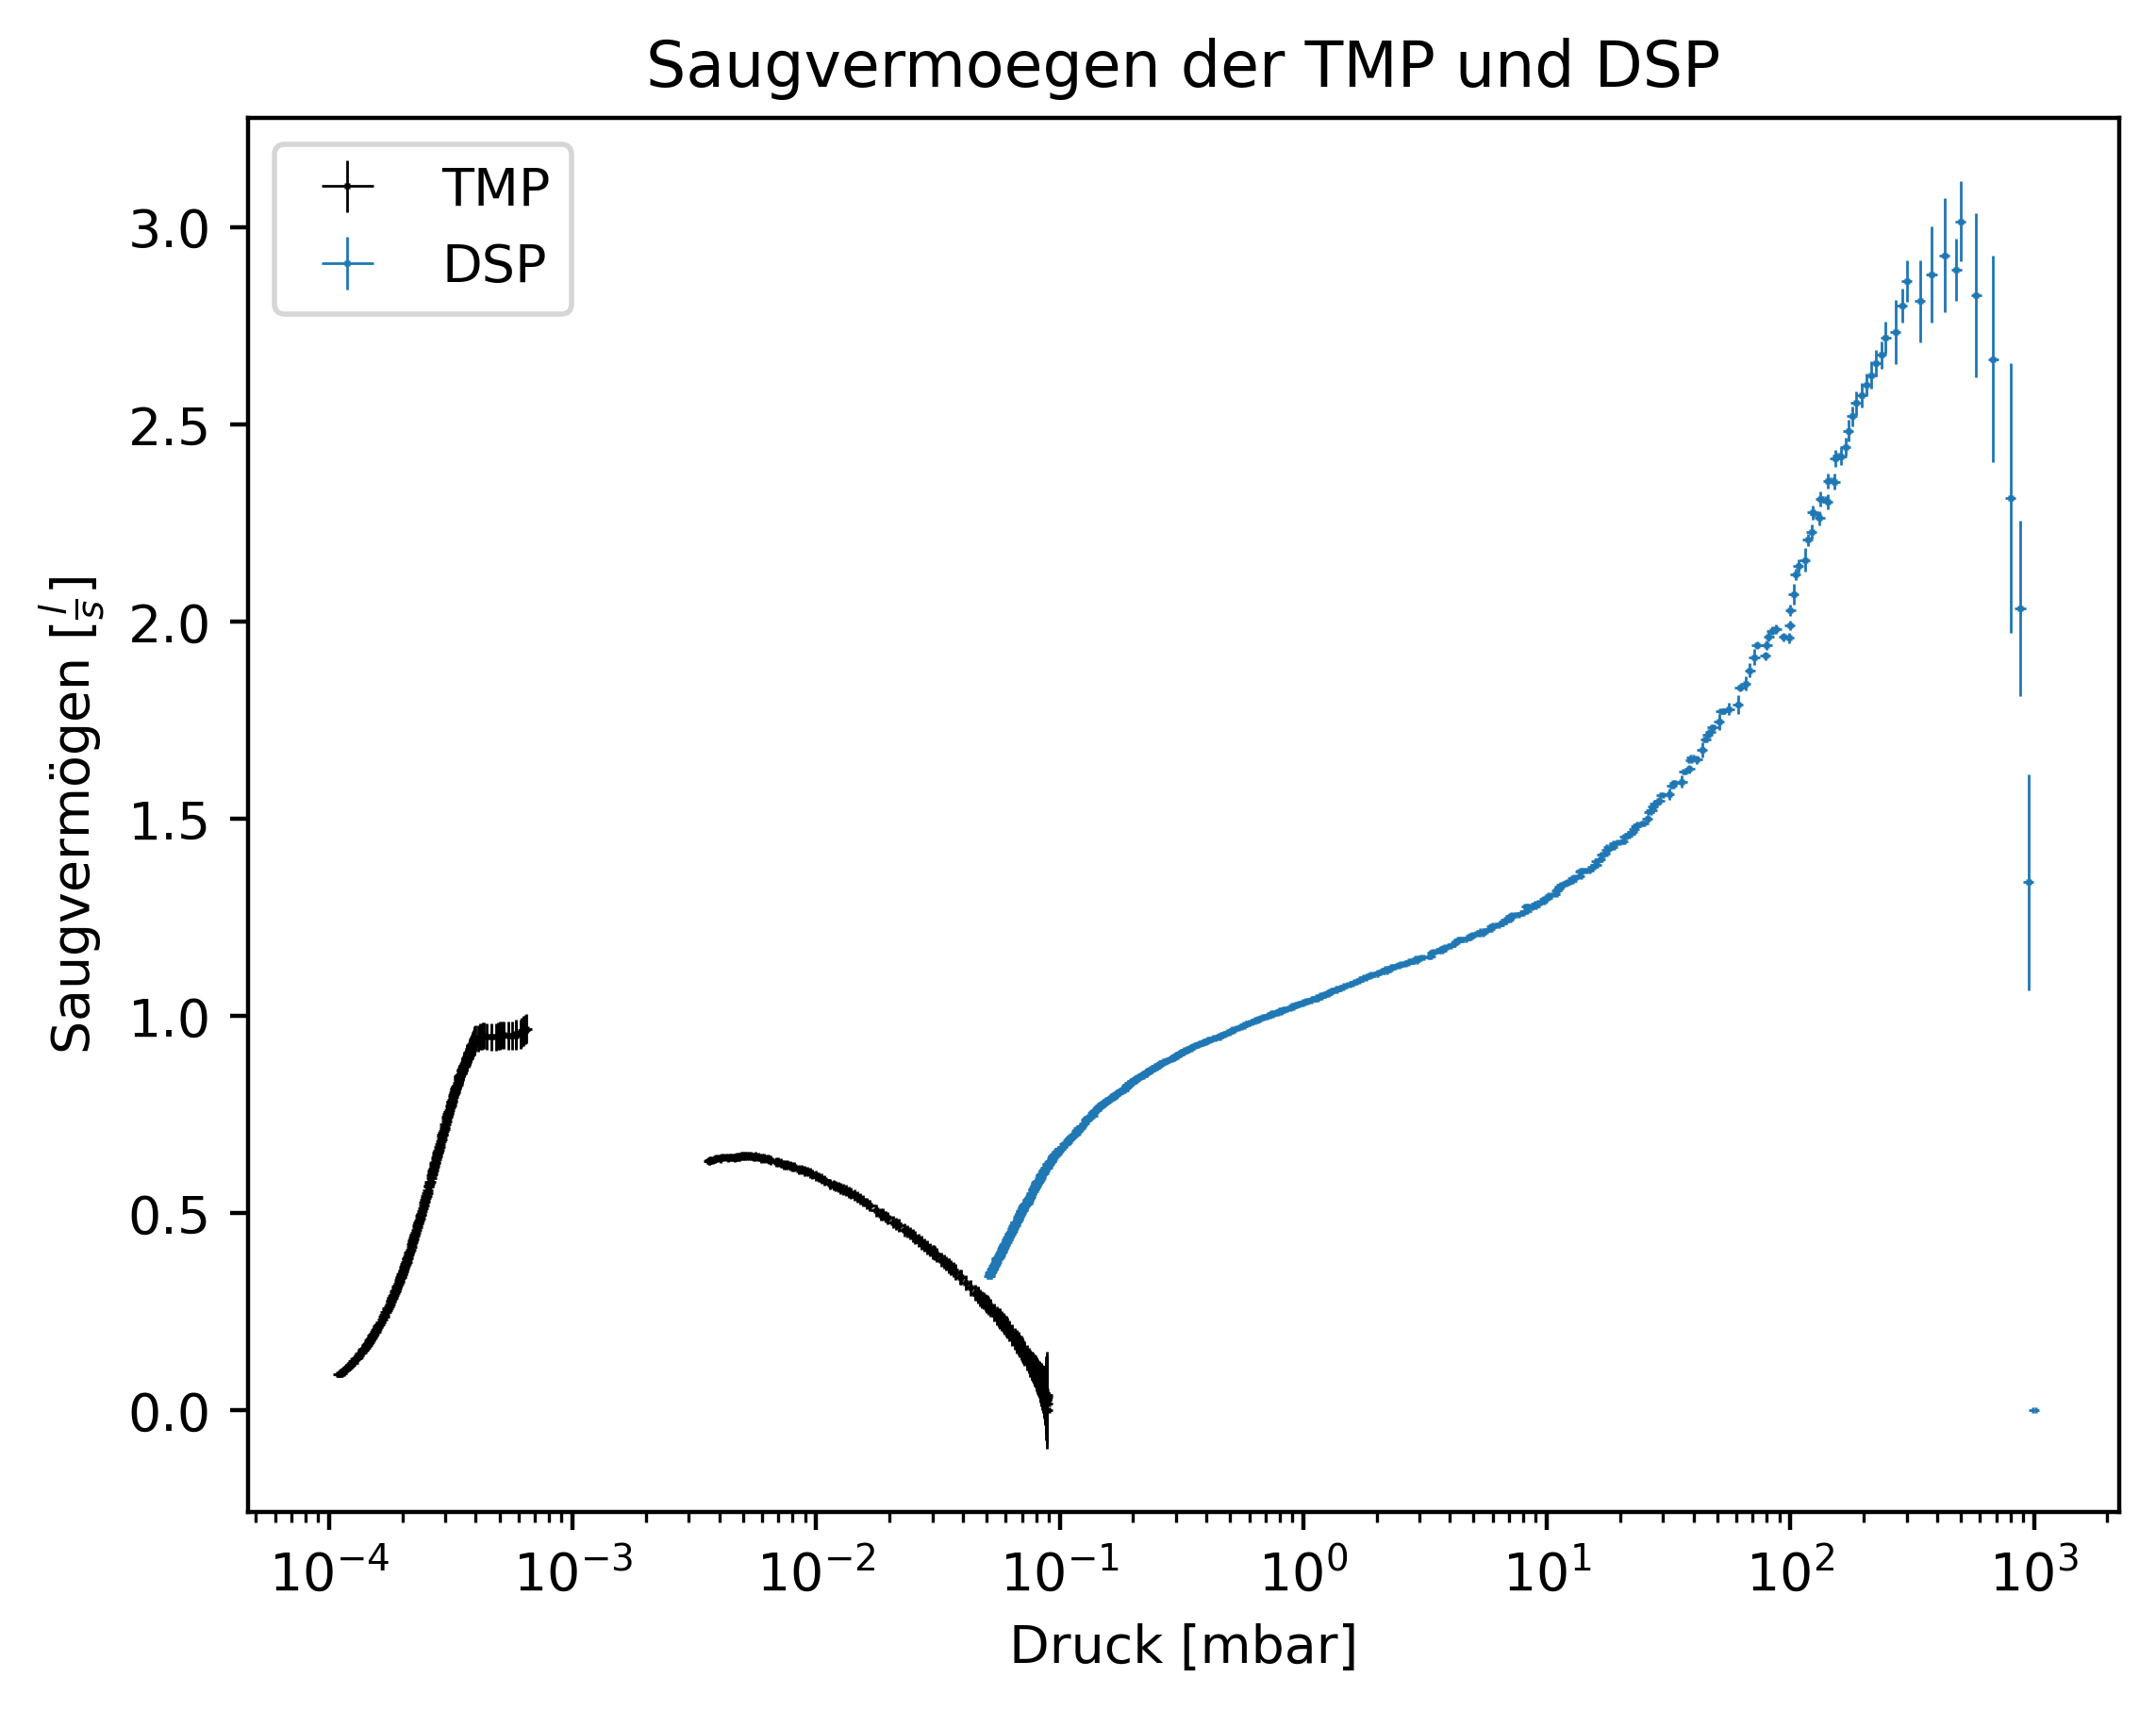

In [606]:
tmp = pd.read_csv('doc/2.3.csv')

def Sun(t,p,V=10,p0=tmp['T2/T3'].iloc[0]):
    return -V/t*log(p/p0)

tmp=tmp
#tmp['comp'] = np.linspace(1,0,len(tmp))*tmp['T2/T3']+np.linspace(0,1,len(tmp))*tmp['pumpe']
tmp['comp'] = pd.concat((tmp['T2/T3'].iloc[:1600],tmp['pumpe'].iloc[1600:]))
tmp['time[s]'] -= list(tmp['time[s]'])[0]
tmp['S'] = S(tmp['time[s]'],tmp['comp'],p0=list(tmp['T2/T3'])[0])
tmp['S_err'] = [Sun(x+0.00001,ufloat(y,0.05*y)).s for x,y in zip(tmp['time[s]'].iloc[:1600],tmp['comp'].iloc[:1600])]+[Sun(x+0.00001,ufloat(y,0.2*y)).s for x,y in zip(tmp['time[s]'].iloc[1600:],tmp['comp'].iloc[1600:])]

result3 = tmp.groupby('comp')['S'].agg(['mean', 'std'])
result3_error = tmp.groupby('comp')['S_err'].agg(['mean', 'std'])
result3_error['mean'].iloc[-5:] = 0
plt.errorbar(result3.index,result3['mean'],yerr=result3_error['mean'],xerr=error(result3.index),fmt='s',color='black',lw=0.5,markersize = 0.1,label='TMP')
plt.xlabel('Druck [mbar]')
plt.ylabel(r'Saugvermögen [$\frac{l}{s}$]')
plt.xscale('log')
plt.errorbar(result.index,result['mean'],yerr=result['std'],xerr=error(result.index),fmt='s',lw=0.5,markersize = 0.1,label='DSP')
plt.legend()
plt.title('Saugvermoegen der TMP und DSP')


result3 = tmp.groupby('comp')['S'].agg(['mean', 'std'])

plt.gcf().set_dpi(400)

Anhand der Abbildung sind die Anwendungsbereiche der DSP und der TMP eindeutig erkennbar. 

Es wird schnell klar, dass die DSP bei hohen Drücken von $p \approx 400 mbar$ ihr maximales Saugvermögen aufweist. 

Die TMP findet vorallem bei sehr niedrigen Drücken eine Anwenung. Ihr maximales Saugvermögen liegt bei $p \approx 5*10^{-3} mbar$.

Der Große Sprung bei den Drücken der TMP lässt sich von dem Wechsel des Ablesewertes von T3 hin zur IM erklären.

Für die Kraft der Luft auf die Glasglocke gilt und damit auf das Gummiband gilt:

$$
F = \Delta p\,A
$$

$$
A = \frac{D^2}{4}\pi
$$

$$
F = \Delta p\,\frac{D^2}{4}\pi
$$

Desweiteren gilt für kleine Drücke:
$$
\Delta p \approx 1000\,\mathrm{mbar} = 10^5 \frac{N}{m^2}
$$

In [589]:
print('Anpresskraft: ',10**5*ufloat(0.220,0.0005)**2/4*np.pi, 'N')

Anpresskraft:  3801+/-17 N


## Aufgabe 3: Experimente im Vakuum

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Vakuum/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Für diese Aufgabe führen Sie einige einfache Experimente im Vakuum durch. 
 - Bearbeiten Sie hierzu die folgenden Aufgaben. 

### Aufgabe 3.1: Statische Kalibration von T3

Führen Sie mit Hilfe des Referenzvolumes RV eine statische Kalibration des Vakuummeters T3 durch.

---

In [2]:
[3.58,7.32,11.2,15.1,17,23.4,28.0,32.1,37.4,42.0,47.0,52.2,60.8,66.0,71.3,77.6,85.6]

[3.58,
 7.32,
 11.2,
 15.1,
 17,
 23.4,
 28.0,
 32.1,
 37.4,
 42.0,
 47.0,
 52.2,
 60.8,
 66.0,
 71.3,
 77.6,
 85.6]

### Aufgabe 3.2: Elektrische Durchschlagfestigkeit

 - Bestimmen Sie die elektrische Durchschlagfestigkeit der KE als Funktion des Umgebungsdrucks in Luft. 
 - Diese Aufgabe kann nur an den Apparaturen 41 und 42 durchgeführt werden. 

---

In [3]:
durchschlag = np.array([[1000,4225],[500,1223],[249,1100],[122,867],[62.4,682],[31.8,525],[15.1,407],[7.52,387],[3.52,323],[1.72,300],[0.842,399],[0.433,443],[0.200,425],[0.0833,525]]) #[Druck[mbar],Spannung]

durchschlagTMP = np.array([[0.02,1000],[0.025,910],[0.03,835],[0.35,777],[0.46,710],[0.053,601],[0.056,585],[0.06,576],[0.065,566],[0.07,559],[0.075,553],[0.08,545],[0.083,542],[0.086,539],[0.09,537],[0.095,532],[0.1,530],[0.11,525]])

### Aufgabe 3.3: Aufdampfen von Indium

Dampfen Sie mit Hilfe einer Schablone bei zwei verschiedenen Drucken Indium auf eine Plexiglasplatte auf.

---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

In [527]:
np.log(ufloat(1,0.1))

TypeError: loop of ufunc does not support argument 0 of type Variable which has no callable log method